In [1]:
from google.colab import files
files.upload()

Saving customer_churn.csv to customer_churn.csv


{'customer_churn.csv': b'CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn\r\nC00001,6,64,1540,One year,Credit Card,No,1,0\r\nC00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0\r\nC00003,27,31,1455,Two year,Credit Card,No,1,0\r\nC00004,53,29,7150,Month-to-month,Electronic Check,No,1,0\r\nC00005,16,185,1023,One year,Electronic Check,No,1,0\r\nC00006,55,44,7538,Two year,Electronic Check,No,0,0\r\nC00007,66,99,4178,Two year,Bank Transfer,No,1,0\r\nC00008,61,128,3088,Month-to-month,Bank Transfer,No,1,0\r\nC00009,64,124,7973,Month-to-month,Credit Card,No,1,0\r\nC00010,14,120,5844,One year,Bank Transfer,Yes,1,0\r\nC00011,59,57,5168,One year,Credit Card,Yes,0,0\r\nC00012,7,110,7282,Month-to-month,Electronic Check,No,1,1\r\nC00013,53,86,3438,Month-to-month,Bank Transfer,Yes,1,0\r\nC00014,8,158,6194,Month-to-month,Credit Card,No,1,1\r\nC00015,53,58,768,Month-to-month,Credit Card,Yes,1,0\r\nC00016,65,77,4071,Month-to-month,Credit Ca

In [2]:
import pandas as pd

df = pd.read_csv("customer_churn.csv")
df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


## Capstone Project: Customer Churn Analysis

Business Problem:
Some customers are leaving the company.
We want to understand why customers leave
and how to reduce customer churn.

In [3]:
df.shape

(500, 9)

In [4]:
df.columns

Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='object')

In [5]:
df['Churn'].value_counts()

,count
Churn,
0,447
1,53


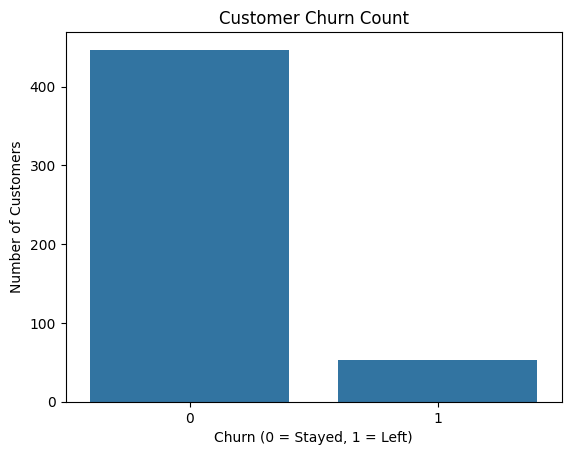

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Count")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Customers")
plt.show()

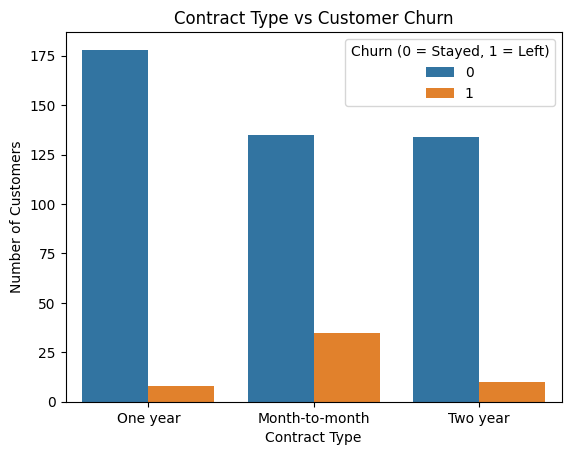

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Customer Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn (0 = Stayed, 1 = Left)")
plt.show()

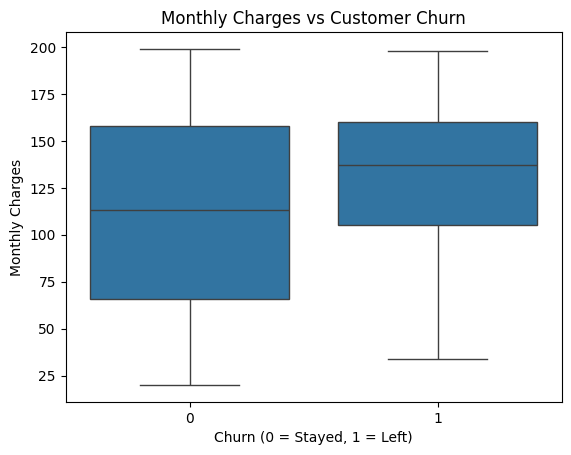

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Customer Churn")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Monthly Charges")
plt.show()

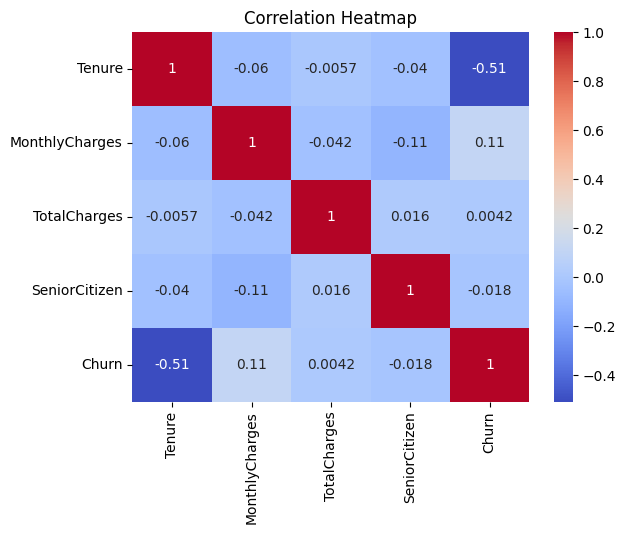

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# फक्त numeric columns घे
num_df = df.select_dtypes(include=np.number)

# correlation calculate कर
corr = num_df.corr()

# heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
from scipy import stats

churn_yes = df[df['Churn'] == 1]['MonthlyCharges']
churn_no  = df[df['Churn'] == 0]['MonthlyCharges']

# t-test
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no)

t_stat, p_value

(np.float64(2.4102471700825414), np.float64(0.016303157985223953))

## Hypothesis Testing Result

A t-test was conducted to compare the monthly charges of churned and non-churned customers.
The p-value obtained was 0.016, which is less than 0.05.

This indicates that monthly charges have a statistically significant impact on customer churn.
Customers with higher monthly charges are more likely to churn.